# 1 - Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import csv 
from google.colab import files

from sklearn.metrics import precision_score

from sklearn.preprocessing import StandardScaler
from collections import defaultdict

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

from sklearn import svm

import matplotlib.pyplot as plt 
# !pip install --upgrade openpyxl

# 2 - Importing Data

In [ ]:
file = files.upload()
main = pd.read_csv("F1Data.csv") 
main.head()

Saving F1Data.csv to F1Data.csv


,Unnamed: 0,season,round,circuit_id,country,driver,nationality,constructor,podium,driver_points,driver_wins,driver_position,constructor_points,constructor_wins,constructor_position,driver_age
0,0,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
1,1,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
2,2,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
3,3,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
4,4,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32


# 3 - Defining prediction models

In [ ]:
def regression(model):
    score = 0
    for circuit in main[main.season == 2021]['round'].unique():

        test = main[(main.season == 2021) & (main['round'] == circuit)]
        X_test = test.drop(['driver', 'podium', 'circuit_id', 'country', 'nationality', 'constructor'], axis = 1)
        y_test = test.podium

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        #predictions
        pred = pd.DataFrame(model.predict(X_test), columns = ['results'])
        pred['podium'] = y_test.reset_index(drop = True)
        pred['actual'] = pred.podium.map(lambda x: 1 if x == 1 else 0)
        pred.sort_values('results', ascending = True, inplace = True)
        pred.reset_index(inplace = True, drop = True)
        pred['predicted'] = pred.index
        pred['predicted'] = pred.predicted.map(lambda x: 1 if x == 0 else 0)

        score += precision_score(pred.actual, pred.predicted)

    model_score = score / main[main.season == 2021]['round'].unique().max()
    return model_score

# 4 - Assigning training and validation data

In [ ]:
train = main[main.season <2021]
X_train = train.drop(['driver', 'podium', 'circuit_id', 'country', 'nationality', 'constructor'], axis = 1)
y_train = train.podium
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [ ]:
compare=defaultdict(list)

#5 - Linear Regression Model

In [ ]:
parameters={'intercept': ['True', 'False']}

for intercept in parameters['intercept']:
    model_params = (intercept)
    model1 = LinearRegression(fit_intercept = intercept)
    model1.fit(X_train, y_train)
            
    model_score = regression(model1)
            
    compare['Reg_Model'].append('linear_regression')
    compare['Reg_Params'].append(model_params)
    compare['Reg_Score'].append(model_score)

Linear Regression Metrics

In [ ]:
predictions = model1.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
print('Intercept:', model1.intercept_)

MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

print('Coefficient:', model1.coef_)

R² Value: 0.6421869963778043
Intercept: 11.045322647506524
Mean squared error: 13.524764641452316
Root mean squared error: 3.6776031109205243
Coefficient: [ 43.49313231 -43.49913698  -1.29656154  -0.36871102   0.10377775
   3.11130495  -2.90104373   0.67940449   0.56989836   0.13322055]


ROC Curve for Linear Regression Model

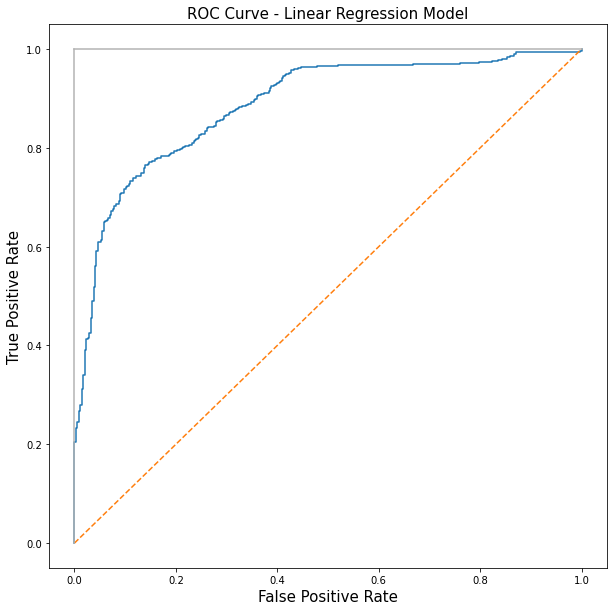

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Linear Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

Actual vs Predicted Values for Linear Regression Model

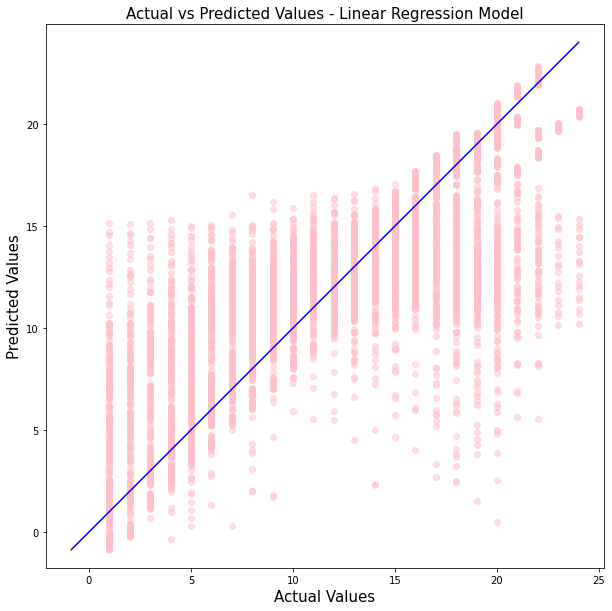

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='pink', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Linear Regression Model', fontsize=15)
plt.axis('equal')
plt.show()

#6 - Random Forest Regressor Model

In [ ]:
parameters={'criterion': ['mse'],
        'max_features': [0.8, 'auto', None],
        'max_depth': list(np.linspace(5, 55, 26)) + [None]}

for criterion in parameters['criterion']:
    for max_features in parameters['max_features']:
        for max_depth in parameters['max_depth']:
            model_params = (criterion, max_features, max_depth)
            model2 = RandomForestRegressor(criterion = criterion, max_features = max_features, max_depth = max_depth, random_state = 1)
            model2.fit(X_train, y_train)
            
            model_score = regression(model2)
            
            compare['Reg_Model'].append('random_forest_regressor')
            compare['Reg_Params'].append(model_params)
            compare['Reg_Score'].append(model_score)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Random Forest Regressor Metrics

In [ ]:
predictions = model2.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

R² Value: 0.954165825432724
Mean squared error: 1.732459181981484
Root mean squared error: 1.3162291525344225


ROC Curve for Random Forest Regressor Model

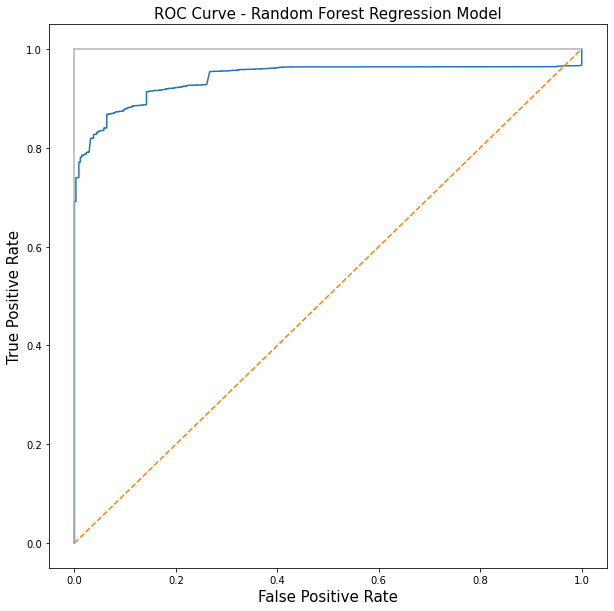

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Random Forest Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

Actual vs Predicted Values for Random Forest Regressor Model

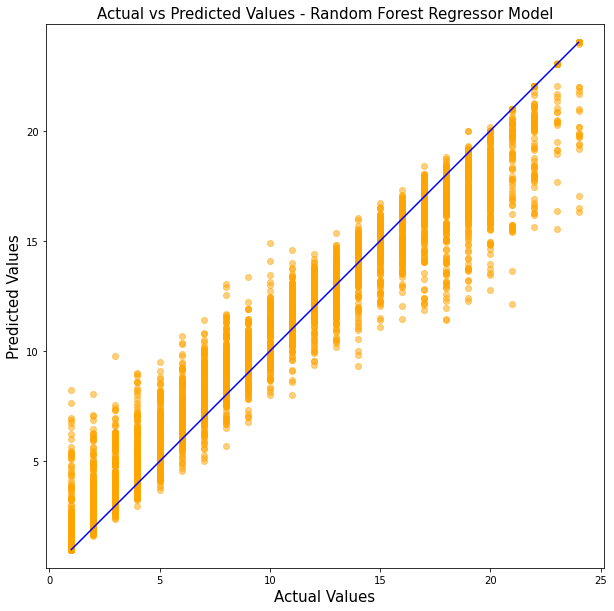

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='orange', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Random Forest Regressor Model', fontsize=15)
plt.axis('equal')
plt.show()

#7 - Support Vector Machine Model

In [ ]:
parameters={'gamma': np.logspace(-4, -1, 10),
        'C': np.logspace(-2, 1, 10),
        'kernel': ['rbf']} 

for gamma in parameters['gamma']:
    for c in parameters['C']:
        for kernel in parameters['kernel']:
            model_params = (gamma, c, kernel)
            model3 = svm.SVR(gamma = gamma, C = c, kernel = kernel)
            model3.fit(X_train, y_train)
            
            model_score = regression(model3)
            
            compare['Reg_Model'].append('svm_regressor')
            compare['Reg_Params'].append(model_params)
            compare['Reg_Score'].append(model_score)

Support Vector Regression Metrics

In [ ]:
predictions = model3.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

R² Value: 0.6857529973840111
Mean squared error: 11.878038826533745
Root mean squared error: 3.446453079113909


ROC Curve for Support Vector Regression

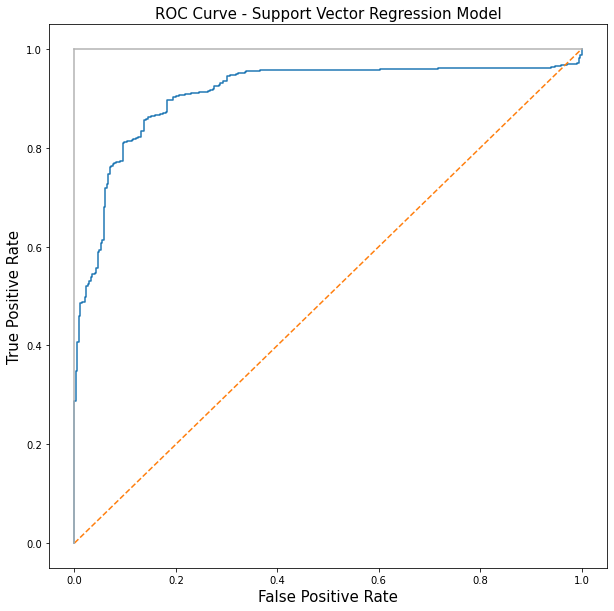

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Support Vector Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

Actual vs Predicted Values for Support Vector Regression Model

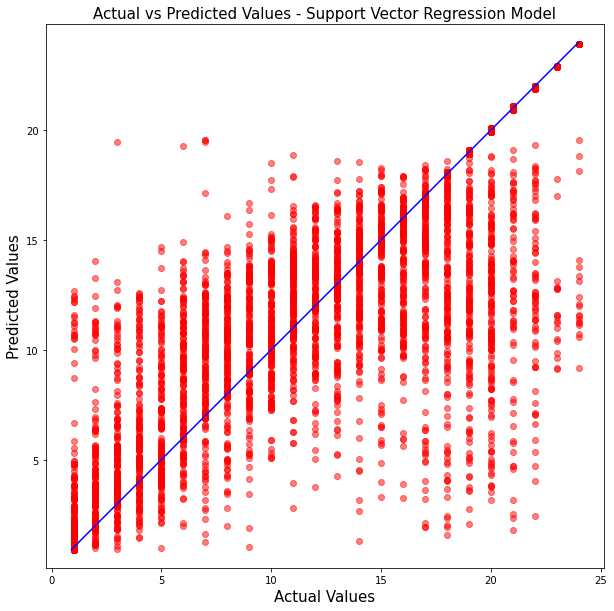

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='red', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Support Vector Regression Model', fontsize=15)
plt.axis('equal')
plt.show()

#8 - Neural Networks Model

In [ ]:
parameters={'hidden_layer_sizes': [(10,9,8,7,6,5), (15,10,5,3)], 
        'activation': ['relu'], 
        'solver': ['lbfgs'], 
        'alpha': np.logspace(-4,1,20)} 

for hidden_layer_sizes in parameters['hidden_layer_sizes']:
    for activation in parameters['activation']:
        for solver in parameters['solver']:
            for alpha in parameters['alpha']:
                model_parameters = (hidden_layer_sizes, activation, solver, alpha )
                model4 = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes,
                                      activation = activation, solver = solver, alpha = alpha, random_state = 1, max_iter=100)
                model4.fit(X_train, y_train)

                model_score = regression(model4)

                compare['Reg_Model'].append('nn_regressor')
                compare['Reg_Params'].append(model_parameters)
                compare['Reg_Score'].append(model_score)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Neural Networks Model Metrics

In [ ]:
predictions = model4.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

R² Value: 0.6982375964797645
Mean squared error: 11.406140760494655
Root mean squared error: 3.377297848945908


ROC Curve for Neural Networks Regression Model

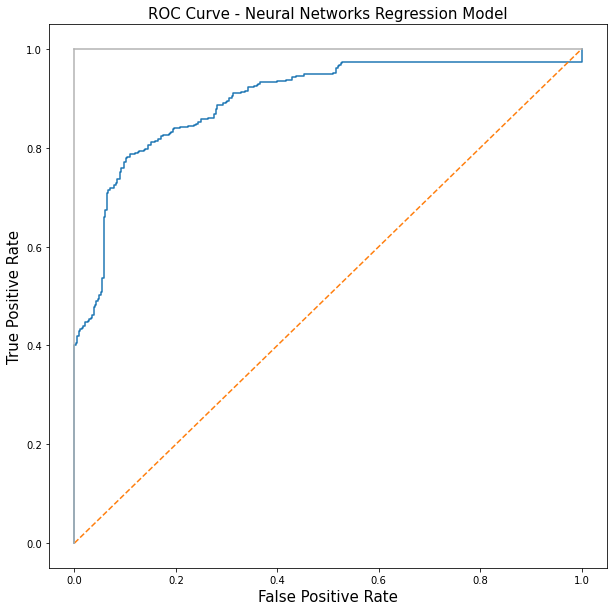

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Neural Networks Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

Actual vs Predicted Values for Neural Networks Regression Model

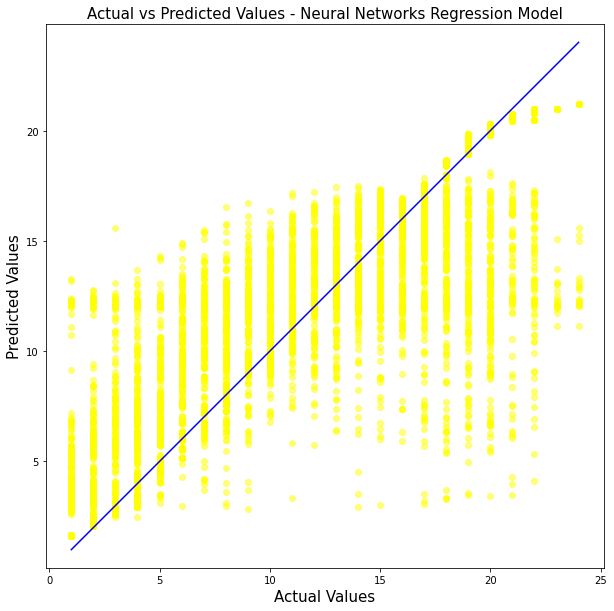

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='yellow', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Neural Networks Regression Model', fontsize=15)
plt.axis('equal')
plt.show()

# 9 - Precision Score of All Models

In [ ]:
new_compare = {}
new_compare['Reg_Model'] = compare['Reg_Model']
new_compare['Reg_Params'] = compare['Reg_Params']
new_compare['Reg_Score'] = compare['Reg_Score']
#groupby score of implemented models
df2 = pd.DataFrame(new_compare).groupby('Reg_Model')['Reg_Score'].max()
df2

Reg_Model
linear_regression          0.318182
nn_regressor               1.000000
random_forest_regressor    0.318182
svm_regressor              0.454545
Name: Reg_Score, dtype: float64

Model Comparison Plot

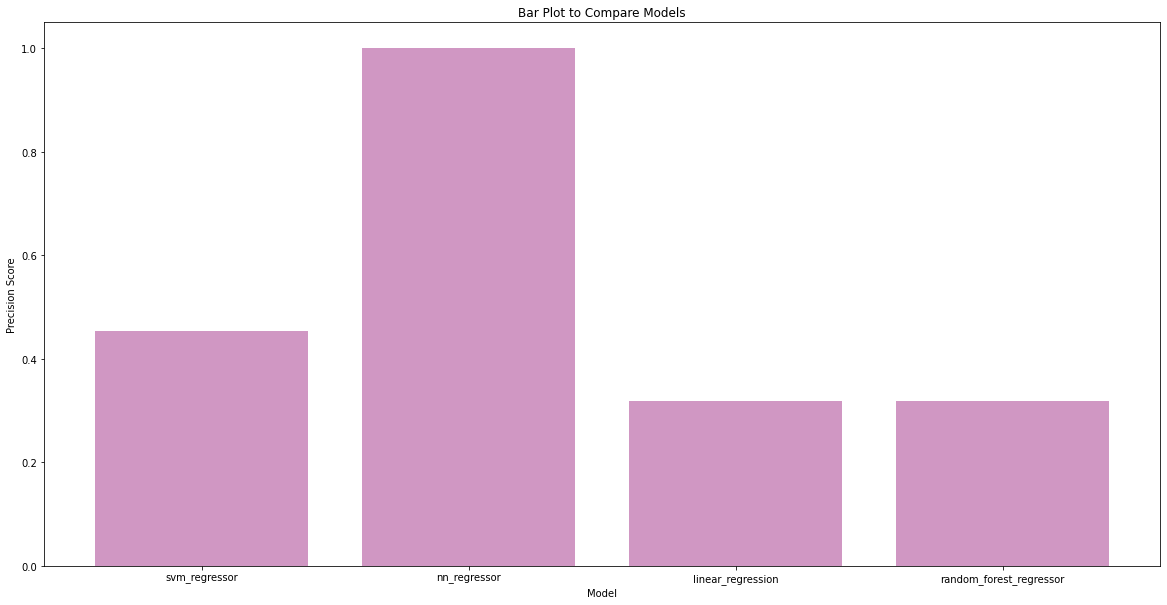

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(new_compare['Reg_Model'], new_compare['Reg_Score'], color="#d097c3")
plt.xlabel('Model')
plt.ylabel("Precision Score")
plt.title('Bar Plot to Compare Models')
plt.show()

#10 - Best Features

Random Forest Regressor Model

In [ ]:
df_x = pd.DataFrame(columns=["Features", "Feature Importance"], data={"Features": X_train.columns, "Feature Importance":model2.feature_importances_})
df_x

,Features,Feature Importance
0,Unnamed: 0,0.134905
1,season,0.005776
2,round,0.057668
3,driver_points,0.224384
4,driver_wins,0.000179
5,driver_position,0.206040
6,constructor_points,0.164210
7,constructor_wins,0.020107
8,constructor_position,0.130913
9,driver_age,0.055818


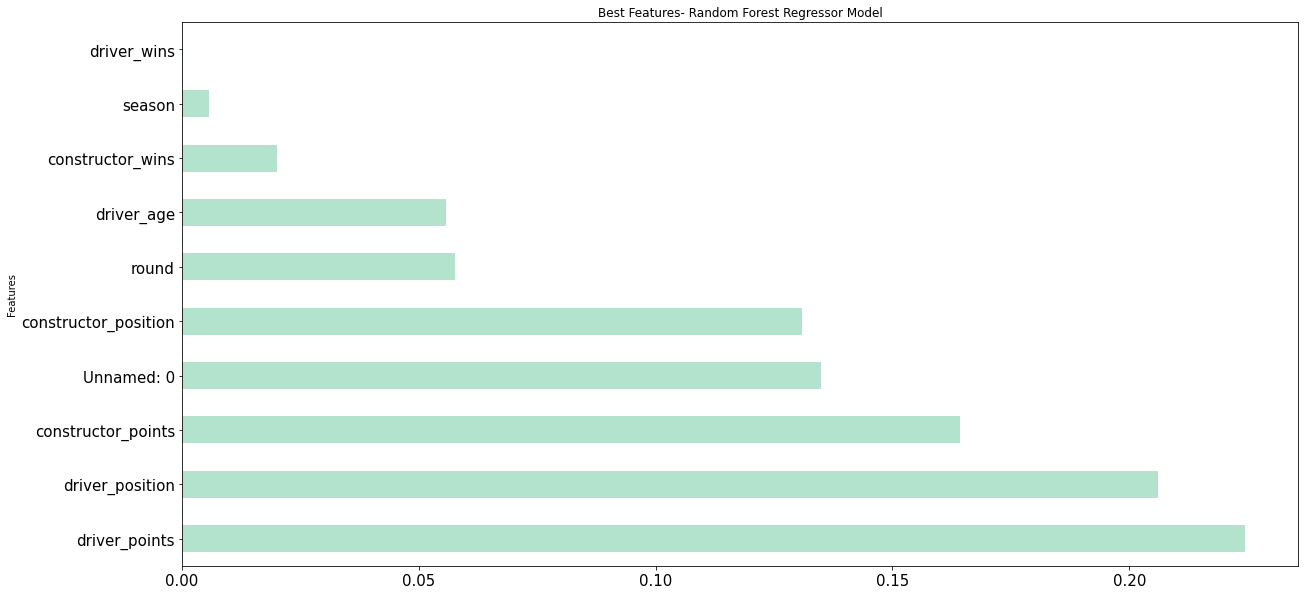

In [ ]:
feature_importances2 = model2.feature_importances_

feat_importances = pd.Series(feature_importances2, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=[20, 10], title="Best Features- Random Forest Regressor Model", ylabel="Features", fontsize=15, colormap="Pastel2")